In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import pylidc as pl
import seaborn as sns
from utils.pylidc_utils import *

# type aliases for not breaking outdated pydicom numpy version:
np.int = int
np.float = float

# DICOM data
**NOTE**: the dicom data is loaded using the `pylidc` package. The data directory path is specified in the configuration file for the package (refer to documentation)

In [44]:

scan = get_scans_by_patient_id("LIDC-IDRI-0001", to_numpy=False)
# scan.contrast_used

# scan = get_scans_by_patient_id("LIDC-IDRI-0002", to_numpy=False)
# scan.contrast_used

# Number of scans with and without contrast agent:
# print(pl.query(pl.Scan).filter(pl.Scan.contrast_used == True).count())
# print(pl.query(pl.Scan).filter(pl.Scan.contrast_used == False).count())

Scan(id=12,patient_id=LIDC-IDRI-0001)

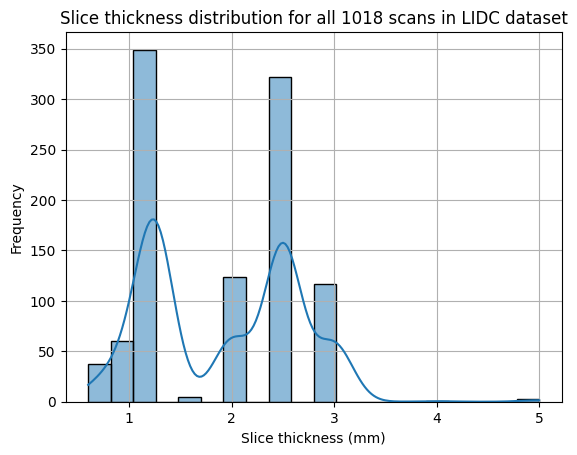

In [40]:
# Slice thickness distribution:
slice_thicknesses = [s.slice_thickness for s in pl.query(pl.Scan).all()]
sns.histplot(slice_thicknesses, bins=20, kde=True)
plt.title(f"Slice thickness distribution for all {len(slice_thicknesses)} scans in LIDC dataset")
plt.xlabel("Slice thickness (mm)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

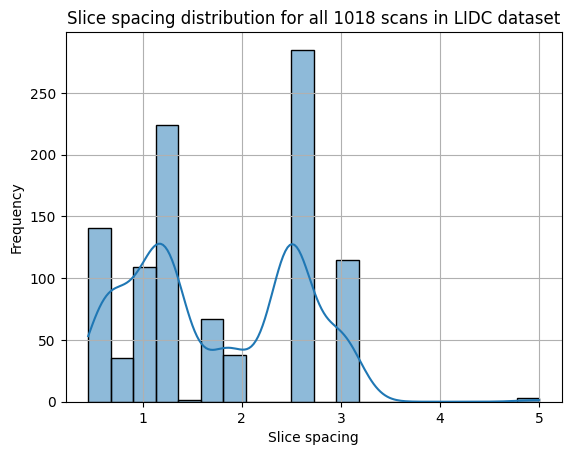

In [43]:
slice_spacings = [s.slice_spacing for s in pl.query(pl.Scan).all()]
sns.histplot(slice_spacings, bins=20, kde=True)
plt.title(f"Slice spacing distribution for all {len(slice_spacings)} scans in LIDC dataset")
plt.xlabel("Slice spacing")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Downloaded Metadata Analysis
(this is for the downloaded data only)

In [2]:
# Data about the downloaded data:
metadata = pd.read_csv("data/lung_data/manifest-1725363397135/metadata.csv").drop(columns=["Data Description URI", "Series UID", "Study UID", "File Location", "Download Timestamp", "SOP Class UID"])
metadata.head()

,Collection,3rd Party Analysis,Subject ID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,Number of Images,File Size
0,LIDC-IDRI,yes,LIDC-IDRI-0001,NaN,01-01-2000,Segmentation of Nodule 1 - Annotation IL057127364,QIICR,SEG,Segmentation Storage,1,236.83 KB
1,LIDC-IDRI,yes,LIDC-IDRI-0001,NaN,01-01-2000,Segmentation of Nodule 1 - Annotation Nodule 001,QIICR,SEG,Segmentation Storage,1,270.28 KB
2,LIDC-IDRI,yes,LIDC-IDRI-0001,NaN,01-01-2000,Nodule 1 - Annotation Nodule 001 evaluations,QIICR,SR,Enhanced SR Storage,1,94.68 KB
3,LIDC-IDRI,yes,LIDC-IDRI-0001,NaN,01-01-2000,Nodule 1 - Annotation IL057127364 evaluations,QIICR,SR,Enhanced SR Storage,1,94.73 KB
4,LIDC-IDRI,yes,LIDC-IDRI-0001,NaN,01-01-2000,Segmentation of Nodule 1 - Annotation MI01412127,QIICR,SEG,Segmentation Storage,1,270.29 KB


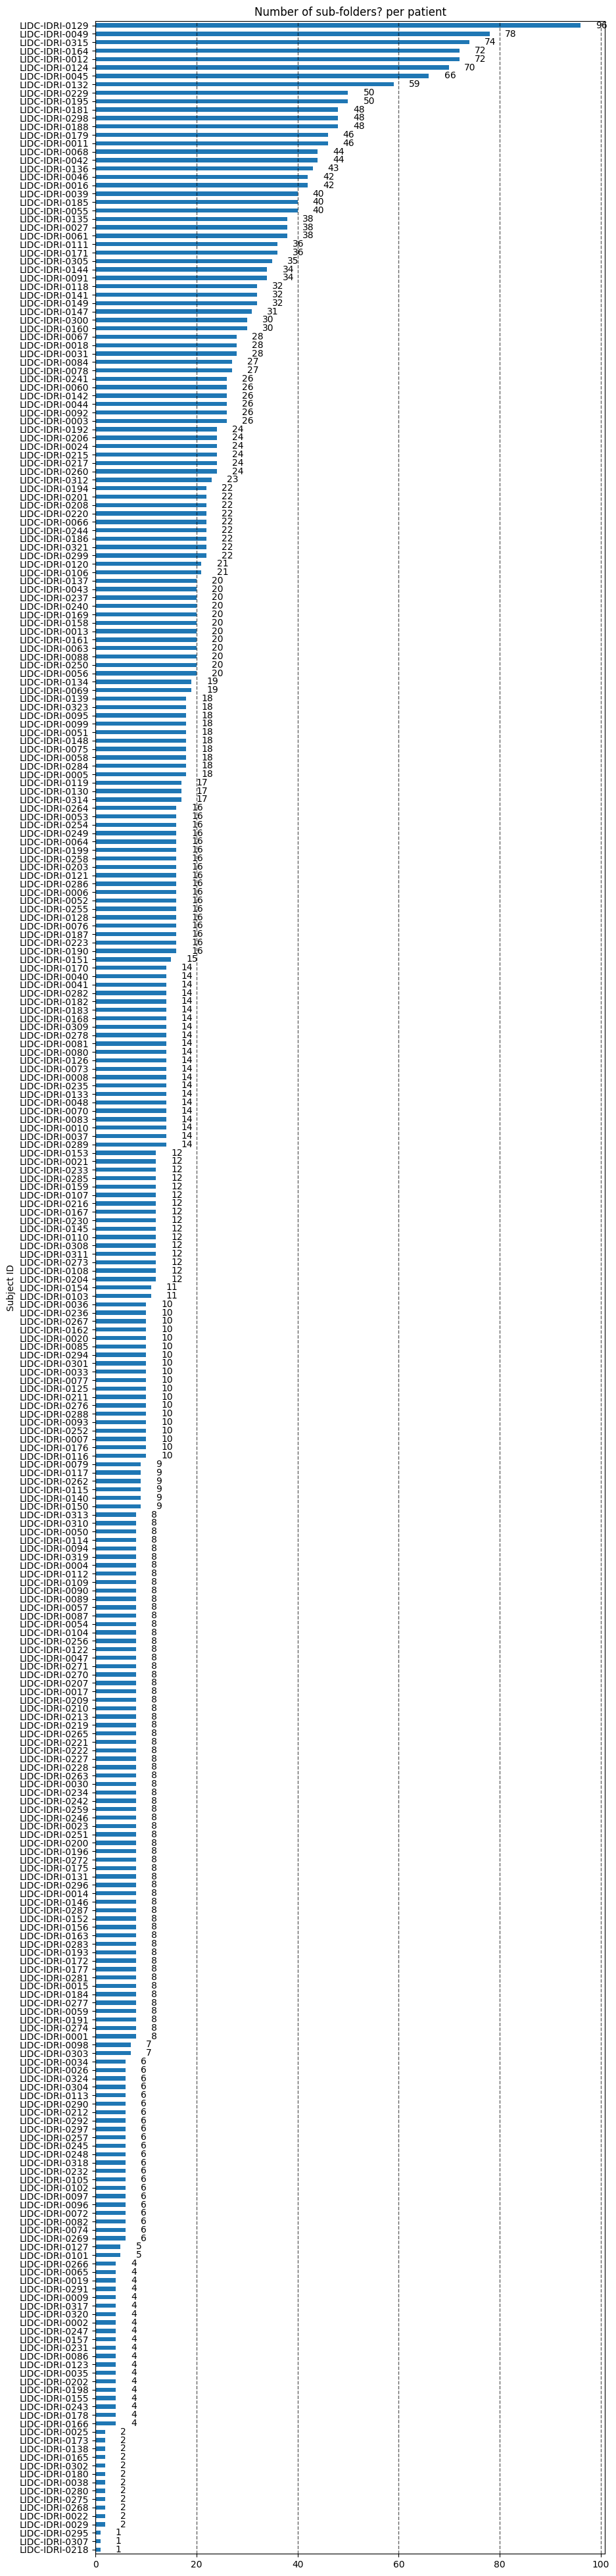

In [32]:
metadata.groupby("Subject ID").size().sort_values(ascending=True).plot(kind="barh", figsize=(10, 50))
# it is corresponding to lowest level of folders in the data folder (so however many files are inside that)
plt.title("Number of sub-folders? per patient")
plt.grid(axis="x", linestyle="--", alpha=0.6, linewidth=1, color="black")
for i, v in enumerate(metadata.groupby("Subject ID").size().sort_values(ascending=True)):
    plt.text(v + 3, i, str(v), color='black', va='center')

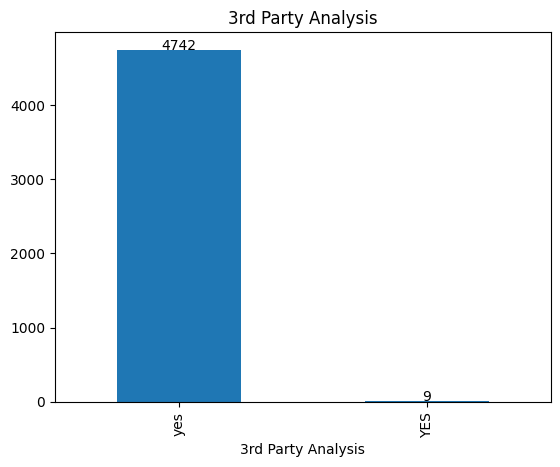

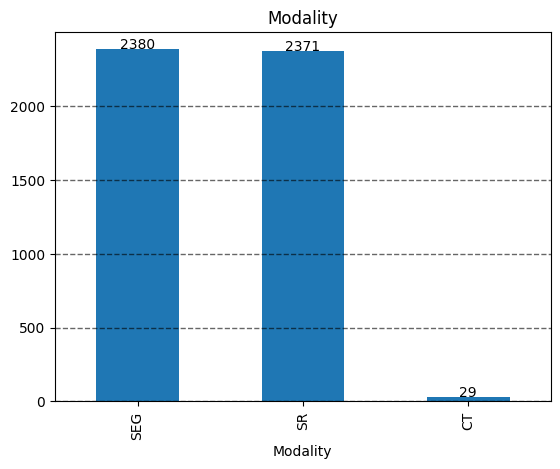

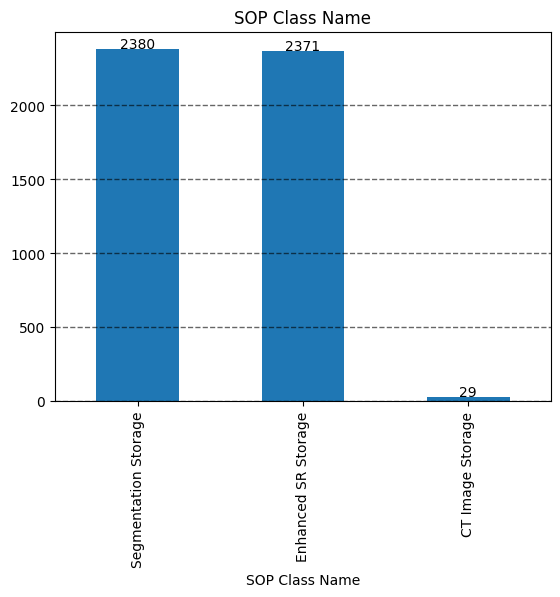

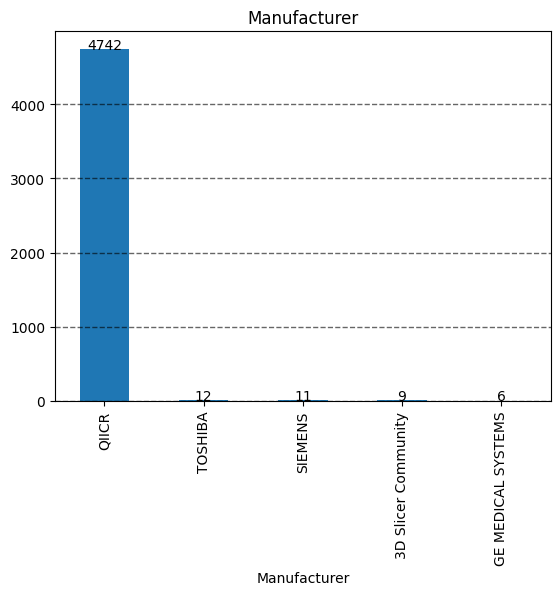

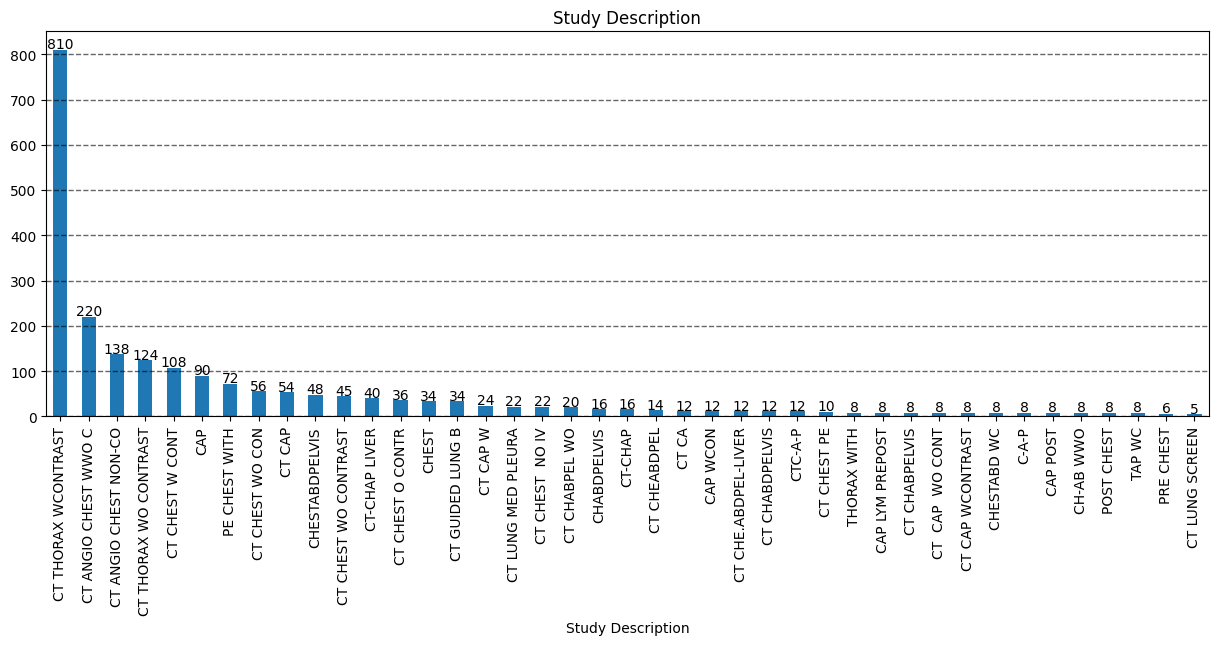

In [36]:
metadata["3rd Party Analysis"].value_counts().plot(kind="bar")
plt.title("3rd Party Analysis")
for i, v in enumerate(metadata["3rd Party Analysis"].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')
plt.show()

metadata["Modality"].value_counts().plot(kind="bar")
plt.title("Modality")
plt.grid(axis="y", linestyle="--", alpha=0.6, linewidth=1, color="black")
for i, v in enumerate(metadata["Modality"].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')
plt.show()

metadata["SOP Class Name"].value_counts().plot(kind="bar")
plt.title("SOP Class Name")
plt.grid(axis="y", linestyle="--", alpha=0.6, linewidth=1, color="black")
for i, v in enumerate(metadata["SOP Class Name"].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')
plt.show()

metadata["Manufacturer"].value_counts().plot(kind="bar")
plt.title("Manufacturer")
plt.grid(axis="y", linestyle="--", alpha=0.6, linewidth=1, color="black")
for i, v in enumerate(metadata["Manufacturer"].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')
plt.show()

metadata["Study Description"].value_counts().plot(kind="bar", figsize=(15, 5))
plt.title("Study Description")
plt.grid(axis="y", linestyle="--", alpha=0.6, linewidth=1, color="black")
for i, v in enumerate(metadata["Study Description"].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')
plt.show()


# Nodule Count Analysis


In [11]:
nodule_counts = pd.read_excel("data/lung_data/lidc-idri-nodule-counts-6-23-2015.xlsx")[:-1] # the last row is a summary
nodule_counts

,TCIA Patent ID,Total Number of Nodules*,Number of Nodules >=3mm**,Number of Nodules <3mm***,Unnamed: 4,Unnamed: 5
0,LIDC-IDRI-0001,4,1,3,NaN,NaN
1,LIDC-IDRI-0002,12,1,11,NaN,*total number of lesions that received either ...
2,LIDC-IDRI-0003,4,4,0,NaN,"**total number of lesions that received a ""nod..."
3,LIDC-IDRI-0004,4,1,3,NaN,"***total number of lesions that received a ""no..."
4,LIDC-IDRI-0005,9,3,6,NaN,NaN
...,...,...,...,...,...,...
1013,LIDC-IDRI-1008,7,6,1,NaN,NaN
1014,LIDC-IDRI-1009,2,1,1,NaN,NaN
1015,LIDC-IDRI-1010,10,1,9,NaN,NaN
1016,LIDC-IDRI-1011,4,4,0,NaN,NaN


<Axes: xlabel='Total Number of Nodules* '>

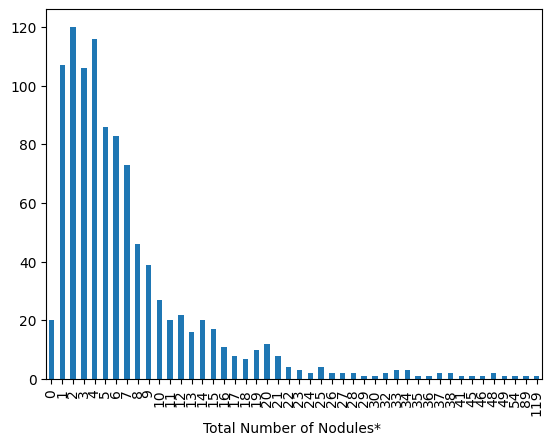

In [12]:
len(nodule_counts[nodule_counts["Total Number of Nodules* "] == 0])
nodule_counts["Total Number of Nodules* "].value_counts().sort_index().plot(kind="bar")

In [17]:
print(f"number of nodules bigger than 3mm: {nodule_counts['Number of Nodules <3mm***'].sum()}")
print(f"number of nodules smaller than or equal to 3mm {nodule_counts['Number of Nodules >=3mm**'].sum()}")

number of nodules bigger than 3mm: 4702
number of nodules smaller than or equal to 3mm 2669


# Diagnosis data
(NOTE: this is for the full dataset)

In [2]:
diagnosis_data = pd.read_excel("data/lung_data/tcia-diagnosis-data-2012-04-20.xls")
diagnosis_data

,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,LIDC-IDRI-0994,2,3,LUL Large cell CA,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,LIDC-IDRI-1002,2,2,non-small cell carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,LIDC-IDRI-1004,2,3,LUL NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,LIDC-IDRI-1010,0,0,lymphoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


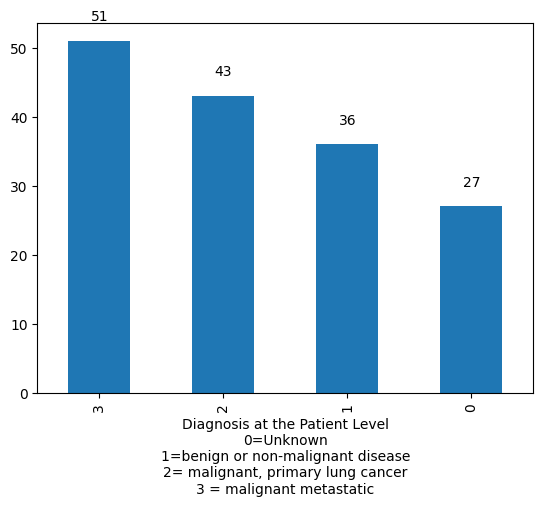

Percentage of each diagnosis:
130


In [12]:
diagnosis_data["Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n"].value_counts().plot(kind="bar")
# add counts on top of the bars
for i, v in enumerate(diagnosis_data["Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n"].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')

plt.show()

patient_diagnosis_data = diagnosis_data["Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n"]
patient_diagnosis_data.value_counts()

print(157 - 27)

In [14]:
diagnosis_data[diagnosis_data["Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n"] == 0]

,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
26,LIDC-IDRI-0173,0,0,bladder,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,LIDC-IDRI-0176,0,0,nonsmall cell lung cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,LIDC-IDRI-0198,0,0,lung cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,LIDC-IDRI-0213,0,0,mycosis fungoides,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,LIDC-IDRI-0217,0,0,lymphoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,LIDC-IDRI-0221,0,0,colon cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,LIDC-IDRI-0222,0,0,melanoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,LIDC-IDRI-0224,0,0,liposarcoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,LIDC-IDRI-0226,0,0,prostate,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,LIDC-IDRI-0230,0,0,breast cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DICOM Metadata Digest
(keep in mind this is for the FULL dataset - just downloaded from the main page)

In [41]:
dicom_metadata_digest = pd.read_csv("data/lung_data/LIDC-IDRI_MetaData.csv").drop(columns=["Study UID", "Series ID"])
dicom_metadata_digest

,Subject ID,Study Description,Study Date,Series Description,Number of images,File Size (Bytes),Collection Name,Modality,Manufacturer
0,LIDC-IDRI-1001,NaN,2000-01-01 00:00:00.0,NaN,194,102096016,LIDC-IDRI,CT,SIEMENS
1,LIDC-IDRI-0778,CHEST,2000-01-01 00:00:00.0,Recon 2:,481,253245158,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
2,LIDC-IDRI-0813,NaN,2000-01-01 00:00:00.0,NaN,157,82630786,LIDC-IDRI,CT,SIEMENS
3,LIDC-IDRI-0710,CHEST,2000-01-01 00:00:00.0,Recon 2: ACRIN LARGE,471,247987448,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
4,LIDC-IDRI-0410,CT LUNG SCREEN,2000-01-01 00:00:00.0,NaN,126,66314722,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
...,...,...,...,...,...,...,...,...,...
1303,LIDC-IDRI-0030,NaN,2000-01-01 00:00:00.0,NaN,119,62645518,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
1304,LIDC-IDRI-0121,NaN,2000-01-01 00:00:00.0,NaN,1,13228740,LIDC-IDRI,CR,Philips Medical Systems
1305,LIDC-IDRI-0974,NaN,2000-01-01 00:00:00.0,NaN,101,53158868,LIDC-IDRI,CT,SIEMENS
1306,LIDC-IDRI-0473,CT CHEST O CONTR,2000-01-01 00:00:00.0,NaN,291,153155158,LIDC-IDRI,CT,GE MEDICAL SYSTEMS


In [74]:
dicom_metadata_digest[dicom_metadata_digest["Subject ID"].duplicated(keep=False)].sort_values("Subject ID")

,Subject ID,Study Description,Study Date,Series Description,Number of images,File Size (Bytes),Collection Name,Modality,Manufacturer
348,LIDC-IDRI-0001,NaN,2000-01-01 00:00:00.0,NaN,133,70018838,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
186,LIDC-IDRI-0001,NaN,2000-01-01 00:00:00.0,NaN,2,16357620,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
1141,LIDC-IDRI-0002,NaN,2000-01-01 00:00:00.0,NaN,261,137396696,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
1100,LIDC-IDRI-0002,NaN,2000-01-01 00:00:00.0,NaN,1,6909958,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
189,LIDC-IDRI-0003,NaN,2000-01-01 00:00:00.0,NaN,5,38580794,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
...,...,...,...,...,...,...,...,...,...
1227,LIDC-IDRI-0365,NaN,2000-01-01 00:00:00.0,NaN,98,51576812,LIDC-IDRI,CT,TOSHIBA
1001,LIDC-IDRI-0442,NaN,2000-01-01 00:00:00.0,ThorRoutine 3.0 B31f,107,56298584,LIDC-IDRI,CT,SIEMENS
557,LIDC-IDRI-0442,NaN,2000-01-01 00:00:00.0,ThoraxRoutine 3.0 B31s,116,61035616,LIDC-IDRI,CT,SIEMENS
136,LIDC-IDRI-0484,NaN,2000-01-01 00:00:00.0,ChestRoutine 3.0 B31f,106,55797516,LIDC-IDRI,CT,SIEMENS


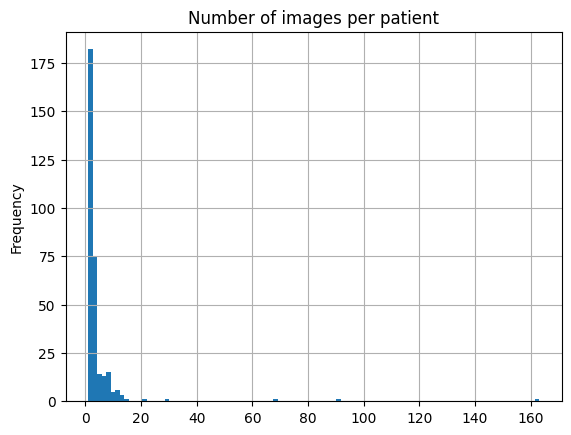

In [64]:
dicom_metadata_digest["Number of images"].value_counts(ascending=False).plot(kind="hist", bins=100)
plt.grid()
plt.title("Number of images per patient")
plt.show()

# Standardise Dicom Data
This dataset contains standardized DICOM representation of the annotations and characterizations collected by the LIDC/IDRI initiative, originally stored in XML and available in the TCIA LIDC-IDRI collection.
(only useful to use i think. Using pylidc is easier).

[Source](https://www.cancerimagingarchive.net/analysis-result/dicom-lidc-idri-nodules/)
this data contains
- segmentations of the nodules
- annotations for the nodules

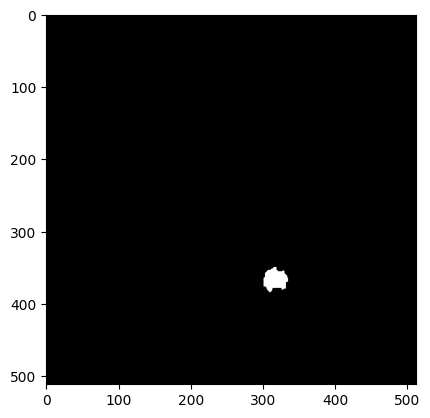

In [29]:
path = "/Users/newuser/Documents/ITU/master_thesis/data/lung_data/standardised_data_format/manifest-1585232716547/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000567.000000-Segmentation of Nodule 1 - Annotation Nodule 001-90548/1-1.dcm"

image = pydicom.dcmread(path)
plt.imshow(image.pixel_array[5], cmap="gray")
plt.show()

In [38]:
# annotations file. Contains no pixel data
path = "/Users/newuser/Documents/ITU/master_thesis/data/lung_data/standardised_data_format/manifest-1585232716547/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000568.000000-Nodule 1 - Annotation Nodule 001 evaluations-32969/1-1.dcm"

image = pydicom.dcmread(path)
# plt.imshow(image.pixel_array, cmap="gray")
# plt.show()

<bound method Dataset.keys of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Enhanced SR Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.89315.1553284069.532967
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0012) Instance Creation Date              DA: '20190322'
(0008, 0013) Instance Creation Time              TM: '154749'
(0008, 0014) Instance Creator UID                UI: 1.2.276.0.7230010.3.0.3.6.3
(0008, 0016) SOP Class UID                       UI: Enhanced SR Storage
(0008, 0018) SOP